In [1]:
import pandas as pd
df1 = pd.read_csv('DGS2.csv')  

In [2]:
df1.head()

,DATE,DGS2
0,1976-06-01,7.260
1,1976-06-02,7.230
2,1976-06-03,7.220
3,1976-06-04,7.120
4,1976-06-07,7.090


In [3]:
df2 = pd.read_csv('GDPC1.csv') 

In [4]:
df2.head()

,DATE,GDPC1
0,1947-01-01,2033.061
1,1947-04-01,2027.639
2,1947-07-01,2023.452
3,1947-10-01,2055.103
4,1948-01-01,2086.017


In [5]:
#Let us try and predict GDP with Prophet.


In [6]:
df2.shape

(288, 2)

# We will first use FBProphet

In [7]:
df2.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC7B67F488>]],
      dtype=object)

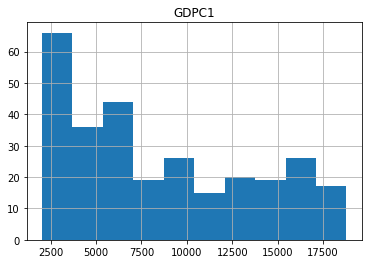

In [8]:
df2.hist()

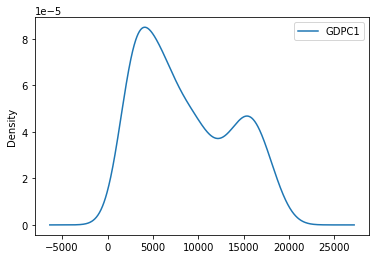

In [9]:
df2.plot(kind='kde')

In [10]:
# The dataset is not stationary

In [11]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [12]:
from fbprophet import Prophet 
p=Prophet()

In [13]:
p.add_seasonality(name="monthly",period = 30, fourier_order=5)

In [14]:
#Split the dataset
X = df2.reset_index()
X

,index,DATE,GDPC1
0,0,1947-01-01,2033.061
1,1,1947-04-01,2027.639
2,2,1947-07-01,2023.452
3,3,1947-10-01,2055.103
4,4,1948-01-01,2086.017
...,...,...,...
283,283,2017-10-01,18223.758
284,284,2018-01-01,18323.963
285,285,2018-04-01,18511.576
286,286,2018-07-01,18664.973


In [15]:
df2.rename(columns={"DATE":"ds","GDPC1":"y"},inplace=True)

In [16]:
df2

,ds,y
0,1947-01-01,2033.061
1,1947-04-01,2027.639
2,1947-07-01,2023.452
3,1947-10-01,2055.103
4,1948-01-01,2086.017
...,...,...
283,2017-10-01,18223.758
284,2018-01-01,18323.963
285,2018-04-01,18511.576
286,2018-07-01,18664.973


In [17]:
train = df2[:230]
test = df2[230:]
test.head()

,ds,y
230,2004-07-01,14464.984
231,2004-10-01,14609.876
232,2005-01-01,14771.602
233,2005-04-01,14839.782
234,2005-07-01,14972.054


In [18]:
p.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
#Future dates:
future = p.make_future_dataframe(periods=6)

pred = p.predict(future)

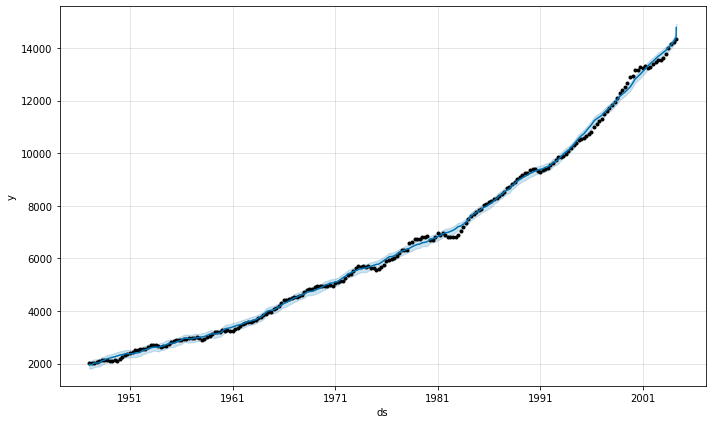

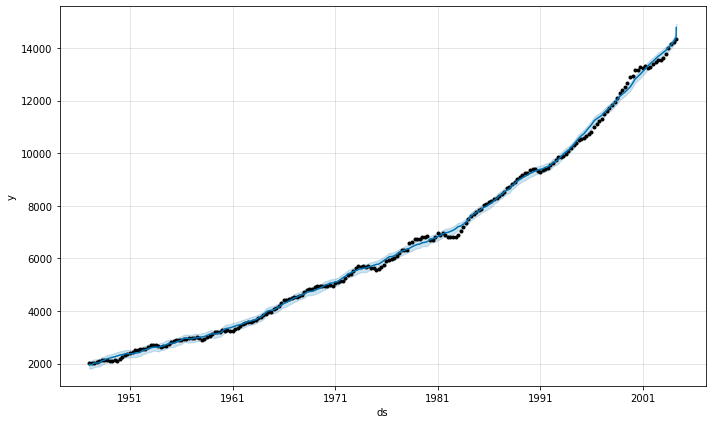

In [20]:
#Potting:
p.plot(pred)

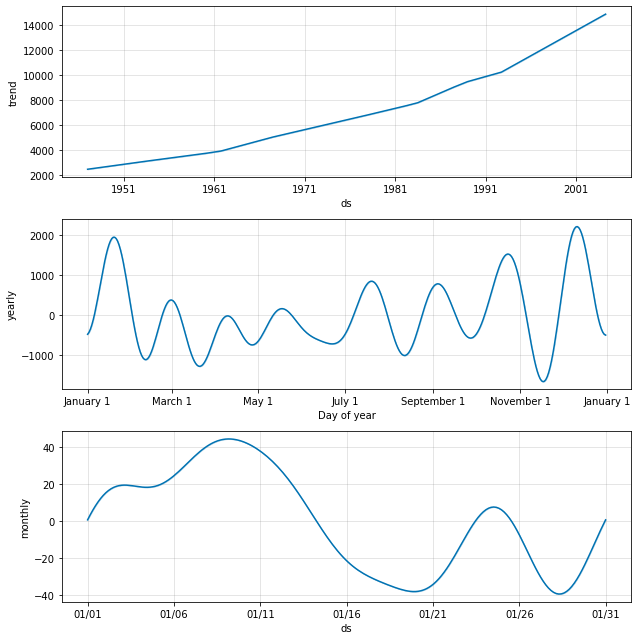

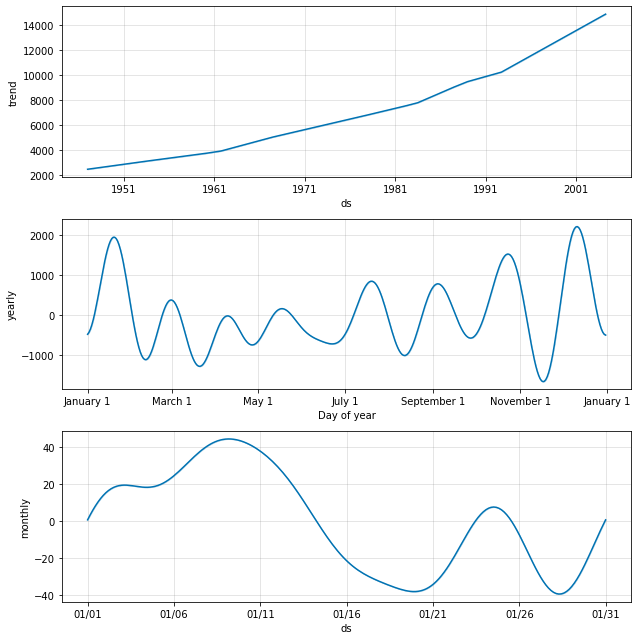

In [21]:
p.plot_components(pred)

In [22]:
test

,ds,y
230,2004-07-01,14464.984
231,2004-10-01,14609.876
232,2005-01-01,14771.602
233,2005-04-01,14839.782
234,2005-07-01,14972.054
235,2005-10-01,15066.597
236,2006-01-01,15267.026
237,2006-04-01,15302.705
238,2006-07-01,15326.368
239,2006-10-01,15456.928


In [23]:
test['dates'] = pd.to_datetime(test['ds'])

C:\Users\Siddhartha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
test

,ds,y,dates
230,2004-07-01,14464.984,2004-07-01
231,2004-10-01,14609.876,2004-10-01
232,2005-01-01,14771.602,2005-01-01
233,2005-04-01,14839.782,2005-04-01
234,2005-07-01,14972.054,2005-07-01
235,2005-10-01,15066.597,2005-10-01
236,2006-01-01,15267.026,2006-01-01
237,2006-04-01,15302.705,2006-04-01
238,2006-07-01,15326.368,2006-07-01
239,2006-10-01,15456.928,2006-10-01


In [25]:
test = test['y']
test

230    14464.984
231    14609.876
232    14771.602
233    14839.782
234    14972.054
235    15066.597
236    15267.026
237    15302.705
238    15326.368
239    15456.928
240    15493.328
241    15582.085
242    15666.738
243    15761.967
244    15671.383
245    15752.308
246    15667.032
247    15328.027
248    15155.940
249    15134.117
250    15189.222
251    15356.058
252    15415.145
253    15557.277
254    15671.967
255    15750.625
256    15712.754
257    15825.096
258    15820.700
259    16004.107
260    16129.418
261    16198.807
262    16220.667
263    16239.138
264    16382.964
265    16403.180
266    16531.685
267    16663.649
268    16621.696
269    16830.111
270    17033.572
271    17113.945
272    17254.744
273    17397.029
274    17438.802
275    17456.225
276    17523.374
277    17622.486
278    17706.705
279    17784.185
280    17863.023
281    17995.150
282    18120.843
283    18223.758
284    18323.963
285    18511.576
286    18664.973
287    18784.632
Name: y, dtype

In [26]:
import matplotlib.pyplot as plt

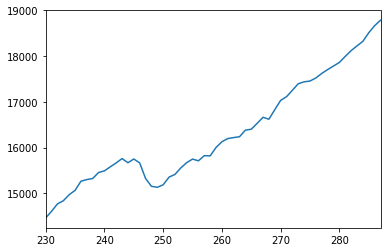

In [27]:
test.plot()

In [28]:
from fbprophet.plot import add_changepoints_to_plot

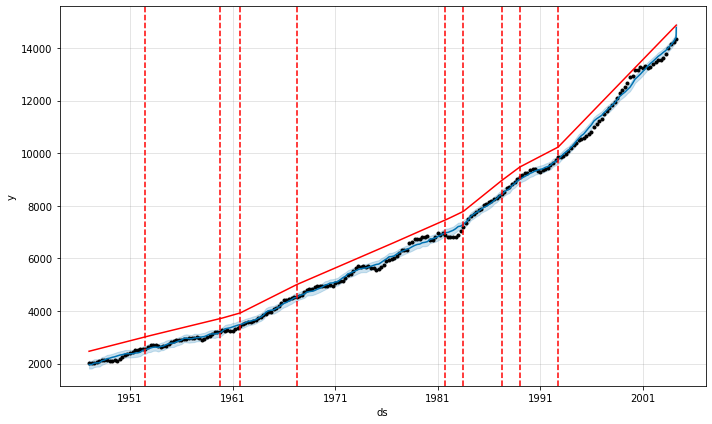

In [29]:
fig = p.plot(pred)
c = add_changepoints_to_plot(fig.gca(),p,pred)

In [30]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1947-01-01,2469.565426,1812.579415,2110.980223,2469.565426,2469.565426,-503.224787,-503.224787,-503.224787,-6.684898,-6.684898,-6.684898,-496.539889,-496.539889,-496.539889,0.0,0.0,0.0,1966.340640
1,1947-04-01,2494.293880,1813.556182,2110.156884,2494.293880,2494.293880,-530.644536,-530.644536,-530.644536,-6.684898,-6.684898,-6.684898,-523.959639,-523.959639,-523.959639,0.0,0.0,0.0,1963.649344
2,1947-07-01,2519.297095,1868.395723,2166.112244,2519.297095,2519.297095,-502.055780,-502.055780,-502.055780,5.673780,5.673780,5.673780,-507.729560,-507.729560,-507.729560,0.0,0.0,0.0,2017.241315
3,1947-10-01,2544.575070,1887.312639,2166.324903,2544.575070,2544.575070,-515.728298,-515.728298,-515.728298,-7.404504,-7.404504,-7.404504,-508.323794,-508.323794,-508.323794,0.0,0.0,0.0,2028.846772
4,1948-01-01,2569.853045,1887.860066,2168.961045,2569.853045,2569.853045,-539.078897,-539.078897,-539.078897,-38.620361,-38.620361,-38.620361,-500.458536,-500.458536,-500.458536,0.0,0.0,0.0,2030.774149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,2004-04-03,14859.742577,14441.068864,14740.749668,14859.742577,14859.742577,-270.253004,-270.253004,-270.253004,5.914287,5.914287,5.914287,-276.167291,-276.167291,-276.167291,0.0,0.0,0.0,14589.489573
232,2004-04-04,14860.844041,14509.793277,14798.605535,14860.844041,14860.844041,-209.712920,-209.712920,-209.712920,-7.404504,-7.404504,-7.404504,-202.308416,-202.308416,-202.308416,0.0,0.0,0.0,14651.131122
233,2004-04-05,14861.945505,14553.661395,14833.558813,14861.945505,14861.945505,-166.236521,-166.236521,-166.236521,-26.389578,-26.389578,-26.389578,-139.846943,-139.846943,-139.846943,0.0,0.0,0.0,14695.708984
234,2004-04-06,14863.046969,14585.898906,14868.612840,14863.046969,14863.046969,-128.633127,-128.633127,-128.633127,-38.620361,-38.620361,-38.620361,-90.012766,-90.012766,-90.012766,0.0,0.0,0.0,14734.413842


# Another Method using Prophet. 

In [31]:
df = pd.read_csv('GDPC1.csv') 

In [32]:
df['GDPC1']

0       2033.061
1       2027.639
2       2023.452
3       2055.103
4       2086.017
         ...    
283    18223.758
284    18323.963
285    18511.576
286    18664.973
287    18784.632
Name: GDPC1, Length: 288, dtype: float64

In [33]:
df["GDPC1"] = df["GDPC1"] - df["GDPC1"].shift(1)

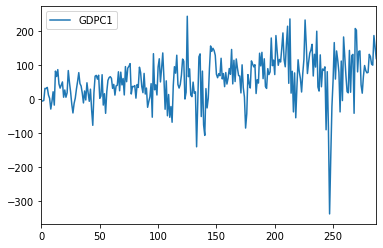

In [34]:
df.plot()

In [35]:
df.columns

Index(['DATE', 'GDPC1'], dtype='object')

In [36]:
df = df.rename(columns = {"DATE":"ds","GDPC1":"y"})

In [37]:
df = df[1:]

In [38]:
df

,ds,y
1,1947-04-01,-5.422
2,1947-07-01,-4.187
3,1947-10-01,31.651
4,1948-01-01,30.914
5,1948-04-01,34.433
...,...,...
283,2017-10-01,102.915
284,2018-01-01,100.205
285,2018-04-01,187.613
286,2018-07-01,153.397


In [39]:
#Fitting the model:

In [40]:
model = Prophet()

In [41]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
df.shape

(287, 2)

In [43]:
future_dates = model.make_future_dataframe(periods = 70)

In [44]:
future_dates.shape

(357, 1)

In [45]:
future_dates.head()

,ds
0,1947-04-01
1,1947-07-01
2,1947-10-01
3,1948-01-01
4,1948-04-01


In [46]:
future_dates.tail()

,ds
352,2018-12-06
353,2018-12-07
354,2018-12-08
355,2018-12-09
356,2018-12-10


In [47]:
prediction = model.predict(future_dates)

In [48]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1947-04-01,2.607853,-51.428848,116.126996,2.607853,2.607853,24.729090,24.729090,24.729090,24.729090,24.729090,24.729090,0.0,0.0,0.0,27.336944
1,1947-07-01,2.885065,-61.618393,104.980425,2.885065,2.885065,18.583889,18.583889,18.583889,18.583889,18.583889,18.583889,0.0,0.0,0.0,21.468954
2,1947-10-01,3.165323,-63.914560,104.538386,3.165323,3.165323,12.515149,12.515149,12.515149,12.515149,12.515149,12.515149,0.0,0.0,0.0,15.680472
3,1948-01-01,3.445581,-71.242899,96.877984,3.445581,3.445581,11.363412,11.363412,11.363412,11.363412,11.363412,11.363412,0.0,0.0,0.0,14.808993
4,1948-04-01,3.722793,-48.739689,111.999965,3.722793,3.722793,24.599680,24.599680,24.599680,24.599680,24.599680,24.599680,0.0,0.0,0.0,28.322473


In [49]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
352,2018-12-06,82.365203,-7.165499,147.345411,82.365203,82.365203,-6.818608,-6.818608,-6.818608,-6.818608,-6.818608,-6.818608,0.0,0.0,0.0,75.546595
353,2018-12-07,82.368249,-5.838960,163.179674,82.368249,82.368249,-5.084754,-5.084754,-5.084754,-5.084754,-5.084754,-5.084754,0.0,0.0,0.0,77.283495
354,2018-12-08,82.371295,-3.682745,167.704375,82.371295,82.371295,-3.257829,-3.257829,-3.257829,-3.257829,-3.257829,-3.257829,0.0,0.0,0.0,79.113466
355,2018-12-09,82.374342,0.496690,162.445093,82.374342,82.374342,-1.368589,-1.368589,-1.368589,-1.368589,-1.368589,-1.368589,0.0,0.0,0.0,81.005753
356,2018-12-10,82.377388,1.358133,164.126806,82.377388,82.377388,0.551747,0.551747,0.551747,0.551747,0.551747,0.551747,0.0,0.0,0.0,82.929135


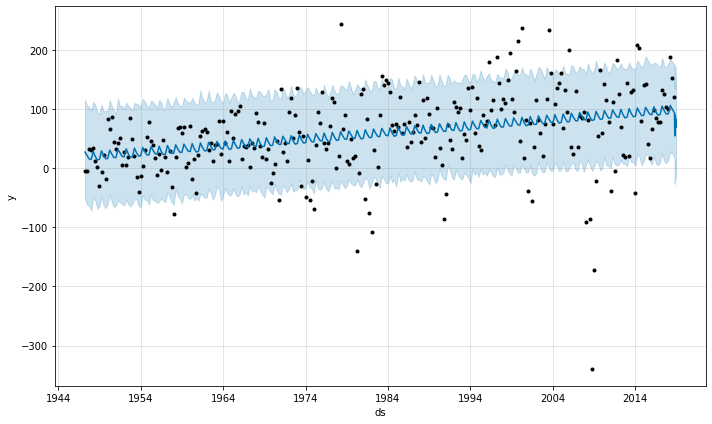

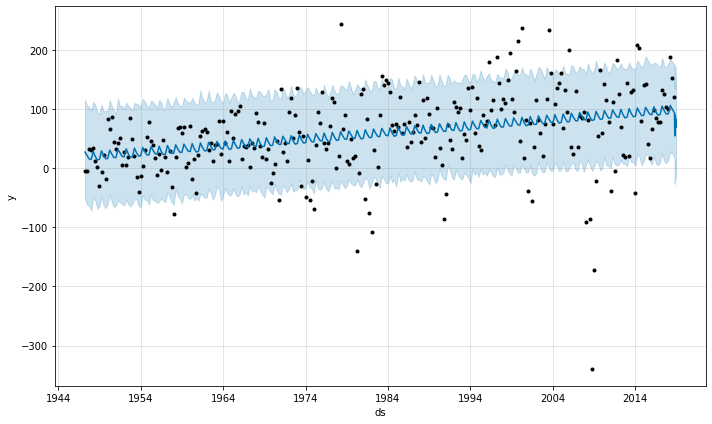

In [50]:
model.plot(prediction)

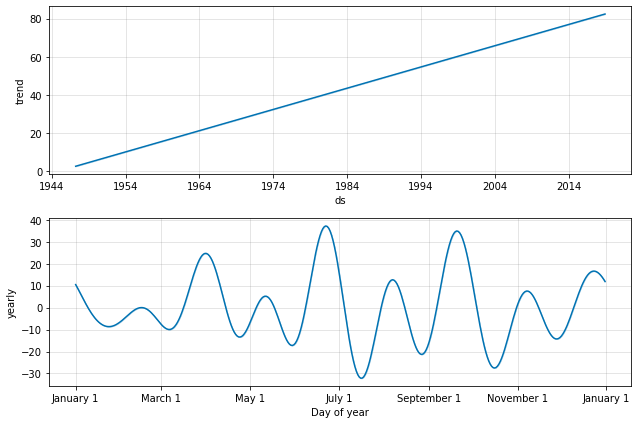

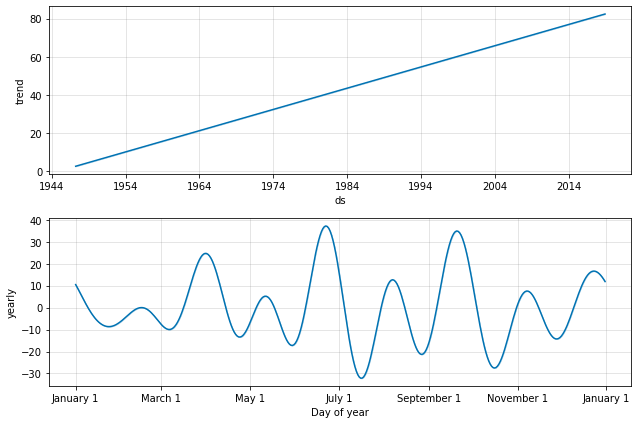

In [51]:
model.plot_components(prediction)

In [52]:
from fbprophet.diagnostics import cross_validation

In [53]:
df.shape

(287, 2)

In [54]:
cv = cross_validation(model,initial='35 days', period = '180 days', horizon='365 days')

INFO:fbprophet:Making 143 forecasts with cutoffs between 1947-10-09 00:00:00 and 2017-10-01 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.
INFO:fbprophet:n_changepoints greater than number of obser

In [55]:
cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1948-01-01,-316.813660,-316.813660,-316.813660,30.914,1947-10-09
1,1948-04-01,16.739935,16.739934,16.739935,34.433,1947-10-09
2,1948-07-01,-26.846699,-26.846700,-26.846698,12.148,1947-10-09
3,1948-10-01,50.008124,50.008123,50.008125,2.383,1947-10-09
4,1948-07-01,-11.507685,-11.507686,-11.507685,12.148,1948-04-06


In [57]:
from fbprophet.diagnostics import performance_metrics

In [58]:
df_pm = performance_metrics(cv)

In [59]:
df_pm

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,3592.664260,59.938838,46.231090,1.412215,0.529765,0.666667
1,39 days,4017.750228,63.385726,47.622783,1.436252,0.529765,0.666667
2,40 days,3701.539681,60.840280,45.433820,1.361755,0.503504,0.701754
3,41 days,4220.531166,64.965615,47.885394,1.397438,0.503504,0.690058
4,42 days,4225.488856,65.003760,48.178822,1.482819,0.503504,0.692982
...,...,...,...,...,...,...,...
304,361 days,4347.486578,65.935473,51.135869,6.495316,0.543733,0.614035
305,362 days,4464.163210,66.814394,52.187727,6.498739,0.543733,0.596491
306,363 days,4703.772419,68.584054,53.641829,6.578564,0.547065,0.584795
307,364 days,5020.298471,70.854065,55.692737,6.630228,0.565715,0.578947


In [61]:
from fbprophet.plot import plot_cross_validation_metric

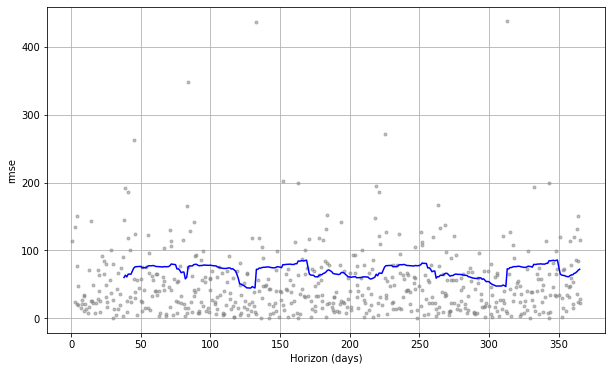

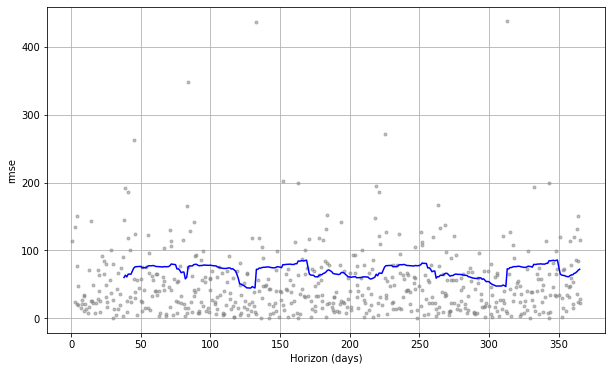

In [62]:
plot_cross_validation_metric(cv,metric='rmse')